# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import timedelta
import random

In [8]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

In [9]:
n = 500 # Number of rows in the dataset

In [12]:
start_date = '2021-01-01'
end_date = pd.Timestamp("now") + timedelta(days=365*1)
dates = pd.date_range(start_date, freq='D', periods=n).tolist()

data = {
    'Date': dates
}

In [14]:
data['Category'] = [random.choice(categories) for _ in range(len(dates))]

In [15]:
data['Likes'] = np.random.randint(low=0, high=10000+1, size=len(dates)).astype(np.int32)

In [16]:
df = pd.DataFrame(data)

In [17]:
df

,Date,Category,Likes
0,2021-01-01,Culture,8673
1,2021-01-02,Fitness,1413
2,2021-01-03,Family,9139
3,2021-01-04,Music,2161
4,2021-01-05,Health,5128
...,...,...,...
495,2022-05-11,Fitness,1332
496,2022-05-12,Food,7237
497,2022-05-13,Fitness,5974
498,2022-05-14,Family,1786


EDA

In [18]:
df.head()

,Date,Category,Likes
0,2021-01-01,Culture,8673
1,2021-01-02,Fitness,1413
2,2021-01-03,Family,9139
3,2021-01-04,Music,2161
4,2021-01-05,Health,5128


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB


In [21]:
df.describe()

,Likes
count,500.00000
mean,4946.80400
std,2934.17468
min,14.00000
25%,2399.25000
50%,4800.00000
75%,7489.50000
max,9969.00000


Clean the Data

In [22]:
# Check for missing values
df.isnull().sum()

Date        0
Category    0
Likes       0
dtype: int64

In [23]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [25]:
# Correct data types 
df['Likes'] = df['Likes'].astype(int)

Categorize Posts

In [26]:
df['Category'].unique()

array(['Culture', 'Fitness', 'Family', 'Music', 'Health', 'Travel',
       'Food', 'Fashion'], dtype=object)

Process Data

In [30]:
category_likes = df.groupby('Category')['Likes'].mean().sort_values(ascending=False)

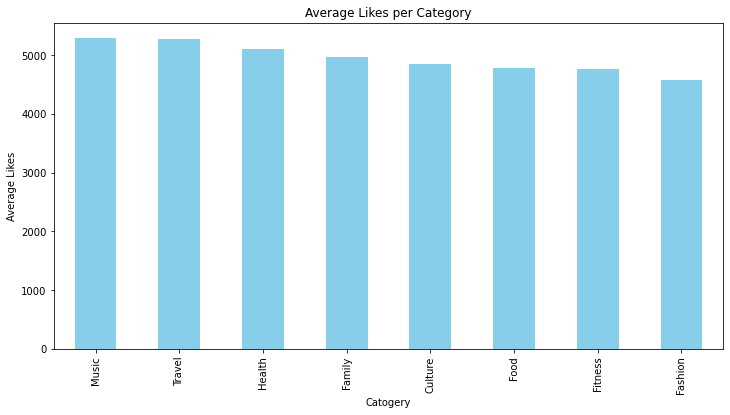

In [32]:
# Visualize 
plt.figure(figsize=(12,6))
category_likes.plot(kind='bar', color ='skyblue')
plt.title('Average Likes per Category')
plt.xlabel('Catogery')
plt.ylabel('Average Likes')
plt.show()

Conclusion

Music and Travel categories have the highest average likes: The analysis shows that tweets related to Music and Travel categories have the highest average likes, indicating that these categories are popular among social media users.

Health and Family categories have moderate average likes: The analysis shows that tweets related to food and travel categories have moderate average likes, indicating that these categories are also popular among social media users but not as much as Music and Travel categories.

Fitness and Fashion categories have the lowest average likes: The analysis shows that tweets related to Fitness and Fashion categories have the lowest average likes, indicating that these categories are less popular among social media users.